Oke dus ik ga het hier schetsen en dan kunnen jullie het verder uitwerken en zien hoe jullie het zouden structureren. Als er iets ni duidelijk is gelieve te vragen.

In [36]:
#imports
import pandas as pd
import cv2  as cv
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import tensorflow as tf
import time 

## inlezen van csv

In [2]:
#read the csv named complete_swarmIoT_full_labeled_dataset.csv and save it in a dataframe
df = pd.read_csv('complete_swarmIoT_full_labeled_dataset.csv')
df.head()


,choice,image
0,2.0,1666698189853.jpg
1,2.0,1666698196832.jpg
2,1.0,1666698203856.jpg
3,2.0,1666698210837.jpg
4,2.0,1666698217850.jpg


## inlezen van alle fotos

in de les hebben we dit gezien
er zijn corrupte fotos. Maar dit kan aan mij liggen ik heb 4 keer de zip moeten downloaden omdat de download telkens failde. Er zijn bij mij 4 corrupte fotos.

```python

leuven = plt.imread('data/leuven.jpg')
proximus = plt.imread('data/proximus.jfif')

leuven = cv.resize(leuven, (416, 416))
proximus = cv.resize(proximus, (416, 416))
images = [leuven, proximus]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
ax[0].imshow(leuven)
ax[1].imshow(proximus)

```

In [11]:
path = 'data computer vision assignment\\'
extension = '*jpg'

images = []

for root, dirs, files in os.walk(path):
    for file in glob.glob(os.path.join(root, extension)):
        try:
            image = plt.imread(file)
            image = cv.resize(image, (416, 416))
            images.append(image)

        except:
            print('image corrupted')
            print(file)


image corrupted
data computer vision assignment\3 De nayer (Loop piste)\partition 1\1666699912159.jpg
image corrupted
data computer vision assignment\3 De nayer (Loop piste)\partition 1\1666699919158.jpg
image corrupted
data computer vision assignment\3 De nayer (Loop piste)\partition 1\1666699926156.jpg
image corrupted
data computer vision assignment\3 De nayer (Loop piste)\partition 1\1666699933158.jpg


In [12]:
images

[array([[[ 36,  39,  48],
         [ 44,  47,  54],
         [ 55,  57,  64],
         ...,
         [ 71,  67,  32],
         [ 80,  77,  46],
         [ 76,  75,  47]],
 
        [[ 39,  42,  51],
         [ 44,  46,  54],
         [ 51,  52,  60],
         ...,
         [ 79,  74,  40],
         [ 78,  75,  45],
         [ 81,  78,  51]],
 
        [[ 41,  43,  52],
         [ 44,  44,  52],
         [ 50,  50,  58],
         ...,
         [101,  96,  63],
         [ 99,  94,  65],
         [100,  95,  70]],
 
        ...,
 
        [[121, 111, 120],
         [121, 111, 120],
         [116, 106, 115],
         ...,
         [176, 164, 165],
         [177, 165, 167],
         [180, 168, 170]],
 
        [[132, 122, 131],
         [133, 123, 132],
         [131, 121, 130],
         ...,
         [188, 176, 178],
         [182, 170, 172],
         [175, 163, 165]],
 
        [[136, 126, 135],
         [137, 127, 136],
         [138, 128, 137],
         ...,
         [188, 176, 178],
  

### Using an existing object detection model from YOLO

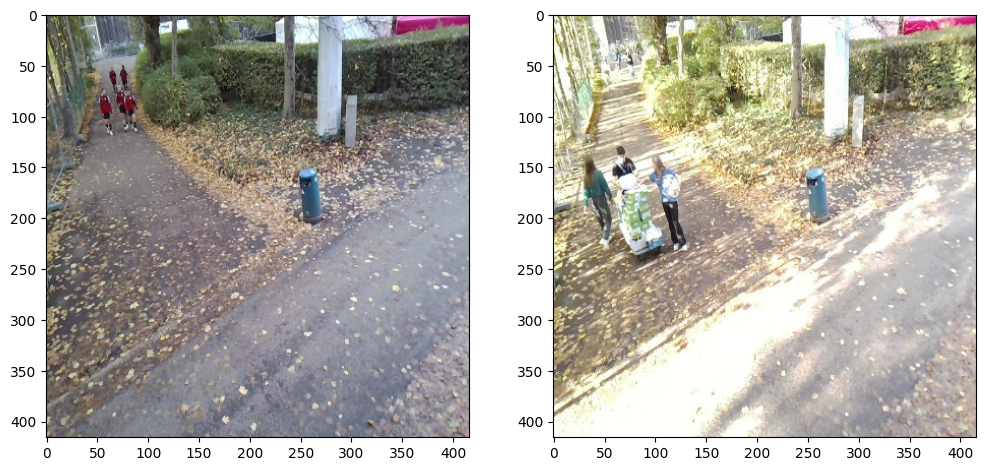

In [23]:
classes = open('coco.names').read().strip().split('\n')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
ax[0].imshow(images[6700])
ax[1].imshow(images[6505])

In [43]:
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8') # Colors for our classes
net = cv.dnn.readNetFromDarknet('YOLO/yolov3.cfg', 'YOLO/yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)

In [32]:
blob = cv.dnn.blobFromImage(images[6505], 1/255.0, (416, 416), crop=False)
blob.shape

(1, 3, 416, 416)

In [37]:
ln = net.getLayerNames()
outNames = net.getUnconnectedOutLayersNames()


net.setInput(blob)
t0 = time.time()
outputs = net.forward(outNames)
t = time.time()
t - 10

1674046453.0759134

In [38]:
outputs = np.vstack(outputs)

In [44]:
proximus = images[6505].copy()
boxes = []
confidences = []
classIDs = []
confTreshHold = 0.5
h, w = proximus.shape[:2]


for output in outputs:
        scores = output[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > confTreshHold:
            box = output[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(proximus, (x, y), (x + w, y + h), color, 1)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(proximus, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.25, color, 1)


fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(proximus)

TypeError: 'int' object is not iterable